### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Warning messages
import warnings

warnings.filterwarnings('ignore')

# Import custom functions
import sys
import os

sys.path.append(os.path.abspath('../'))


### Read Data

In [2]:
df_raw = pd.read_csv('train.csv')

In [3]:
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Initialize an empty dictionary to store the result
categories_dict = {}

with open('data_description.txt', 'r') as file:
    lines = file.readlines()

# Initialize variables
current_key = None

# Iterate through the lines of the file
for line in lines:
    stripped_line = line.strip()
    if not stripped_line:
        # Ignore empty lines
        continue

    if not line.startswith(" "):
        # This is a new key (without space at the beginning)
        current_key = stripped_line.split(":")[0]
        categories_dict[current_key] = []
    elif current_key and line.startswith(" "):
        # This is a value for the current key (with space at the beginning)
        # Add the first word of the line to the list for the current key
        first_word = stripped_line.split()[0]
        categories_dict[current_key].append(first_word)

# Print the resulting dictionary
print(categories_dict)


{'MSSubClass': ['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190'], 'MSZoning': ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 'LotFrontage': [], 'LotArea': [], 'Street': ['Grvl', 'Pave'], 'Alley': ['Grvl', 'Pave', 'NA'], 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'], 'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'], 'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], 'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 'LandSlope': ['Gtl', 'Mod', 'Sev'], 'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], 'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'BldgType': ['1Fam', '2FmCo

In [5]:
# Find entries in the dataset that are not in the categories dictionary
for column in df_raw.columns:
    # Check if the column is categorical
    if df_raw[column].dtype == "object":
        # Check if the column is in the categories dictionary
        if column not in categories_dict:
            print(f"Column '{column}' not found in the categories dictionary.")
        else:
            # Check if all values in the column are in the categories dictionary
            for value in df_raw[column].unique():
                if value not in categories_dict[column]:
                    print(f"Value '{value}' in column '{column}' not found in the categories dictionary.")

Value 'C (all)' in column 'MSZoning' not found in the categories dictionary.
Value 'nan' in column 'Alley' not found in the categories dictionary.
Value 'NAmes' in column 'Neighborhood' not found in the categories dictionary.
Value '2fmCon' in column 'BldgType' not found in the categories dictionary.
Value 'Duplex' in column 'BldgType' not found in the categories dictionary.
Value 'Twnhs' in column 'BldgType' not found in the categories dictionary.
Value 'Wd Sdng' in column 'Exterior1st' not found in the categories dictionary.
Value 'Wd Shng' in column 'Exterior2nd' not found in the categories dictionary.
Value 'Wd Sdng' in column 'Exterior2nd' not found in the categories dictionary.
Value 'CmentBd' in column 'Exterior2nd' not found in the categories dictionary.
Value 'Brk Cmn' in column 'Exterior2nd' not found in the categories dictionary.
Value 'nan' in column 'MasVnrType' not found in the categories dictionary.
Value 'nan' in column 'BsmtQual' not found in the categories dictionary.

In [6]:
print(categories_dict['MSZoning'])
print(categories_dict['Neighborhood'])
print(categories_dict['BldgType'])
print(categories_dict['Exterior1st'])
print(categories_dict['Exterior2nd'])

['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM']
['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']
['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd', 'WdShing']
['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd', 'WdShing']


In [7]:
df_raw.loc[df_raw['MSZoning'] == 'C (all)', 'MSZoning'] = 'C'
df_raw.loc[df_raw['Neighborhood'] == 'NAmes', 'MSZoning'] = 'Names'
df_raw.loc[df_raw['BldgType'] == '2fmCon', 'MSZoning'] = '2FmCon'
df_raw.loc[df_raw['BldgType'] == 'Duplex', 'MSZoning'] = 'Duplx'
df_raw.loc[df_raw['BldgType'] == 'Twnhs', 'MSZoning'] = 'nan'
df_raw.loc[df_raw['Exterior1st'] == 'Wd Sdng', 'MSZoning'] = 'WdShing'
df_raw.loc[df_raw['Exterior2nd'] == 'Wd Sdng', 'MSZoning'] = 'WdShing'
df_raw.loc[df_raw['Exterior2nd'] == 'CmentBd', 'MSZoning'] = 'CemntBd'
df_raw.loc[df_raw['Exterior2nd'] == 'Brk Cmn', 'MSZoning'] = 'BrkComm'

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Display the entire DataFrame
display(df_raw.describe(include='all'))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,12,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,738,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

### Exploratory Data Analysis 

In [10]:
# Copy the dataframe
df = df_raw.copy()

# Drop the columns that are not needed
df = df.drop(['Id'], axis=1)


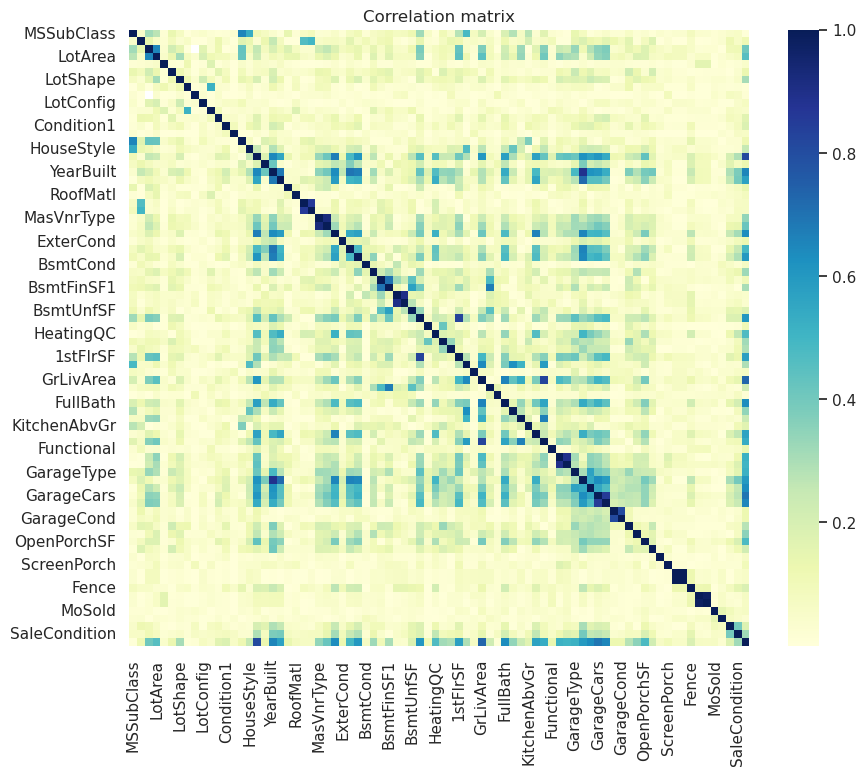

In [11]:
from sklearn.preprocessing import LabelEncoder

#Copy the dataframe
df_eda = df.copy()

# Identify the categorical columns
categorical_columns = df_eda.select_dtypes(include=['object']).columns

# Transform categorical variables 
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_eda[column] = label_encoder.fit_transform(df_eda[column].astype(str))

# Correlation matrix
corr = df_eda.corr('spearman').abs()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='YlGnBu')
plt.title('Correlation matrix')
plt.show()

### Preprocessing

In [12]:
from sklearn.model_selection import train_test_split


# Define the features and the target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the numerical and categorical features
numerical_features= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
categorical_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
ordinal_features = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'FireplaceQu']

In [13]:
# NA values for numerical features and categorical features
numerical_na = df[numerical_features].isna().sum()
categorical_na = df[categorical_features].isna().sum()
ordinal_na = df[ordinal_features].isna().sum()

# Display only columns with non-zero missing values
display(numerical_na[numerical_na > 0].sort_values(ascending=False))
display(categorical_na[categorical_na > 0].sort_values(ascending=False))
display(ordinal_na[ordinal_na > 0].sort_values(ascending=False))

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

MiscFeature    1406
Alley          1369
MasVnrType      872
GarageType       81
Electrical        1
dtype: int64

PoolQC          1453
Fence           1179
FireplaceQu      690
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
dtype: int64

In [14]:
# Create the dictionary with unique values for each ordinal feature
categories_df_dict = {feature: df[feature].dropna().unique().tolist() for feature in ordinal_features}

# Iterate through each key in categories_dict
for key in categories_dict:
    if key in categories_df_dict:
        # Filter values in categories_dict[key] that are either in categories_df_dict[key] or equal to 'NA'
        categories_dict[key] = [value for value in categories_dict[key] 
                                if value in categories_df_dict[key] or value == 'NA']

# Print the updated dictionary
print(categories_dict)

{'MSSubClass': ['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190'], 'MSZoning': ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 'LotFrontage': [], 'LotArea': [], 'Street': ['Grvl', 'Pave'], 'Alley': ['Grvl', 'Pave', 'NA'], 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'], 'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'], 'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], 'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 'LandSlope': ['Gtl', 'Mod', 'Sev'], 'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], 'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'BldgType': ['1Fam', '2FmCo

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
import pandas as pd
from scripts.skewness_fixer import SkewnessFixer


# Define preprocessing for numerical features (Imputation + Skewness Fixing)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('skewness_fixer', SkewnessFixer(skewness_threshold=0.5, boxcox_lambda=0.15))
])

# Define preprocessing for categorical features (Imputation + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the ordinal transformer using the categories from categories_dict
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories=[categories_dict[var] for var in ordinal_features]))
])

# Combine preprocessing steps for each type of feature (without scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

# Fit and transform the training data without scaling
X_train_noscaled = preprocessor.fit_transform(X_train)
X_test_noscaled = preprocessor.transform(X_test)

# Define the full pipeline with scaling applied after encoding
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # Apply all feature transformations
    ('scaler', RobustScaler())        # Apply scaling after encoding
])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Extract categorical feature names from the OneHotEncoder
cat_feature_names = pipeline.named_steps['preprocessor']\
                            .named_transformers_['cat']\
                            .named_steps['onehot']\
                            .get_feature_names_out(categorical_features)

# Manually concatenate feature names for all parts (numerical, categorical, ordinal)
feature_names = list(numerical_features) + list(cat_feature_names) + list(ordinal_features)

# Convert the scaled data into a DataFrame 
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=feature_names)

# Convert the noscaled data into a DataFrame
X_train_noscaled_df = pd.DataFrame(X_train_noscaled, index=X_train.index, columns=feature_names)
X_test_noscaled_df = pd.DataFrame(X_test_noscaled, index=X_test.index, columns=feature_names)

# Scaled the target variable
label_scaler = RobustScaler()
y_train_scaled = label_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = label_scaler.transform(y_test.values.reshape(-1, 1)).flatten()


# Verify the shapes
print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)


(1022, 237)
(438, 237)
(1022,)
(438,)


### Model Training 

In [16]:
from scripts.ml_reg import ml_reg
from scripts.eval_reg import evaluate_models

# Define random state
rs = 42

# Initialize the models with increased iterations
models = ml_reg(rs)

# Evaluate the models
parameters, markdown_content = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
display(Markdown(markdown_content))

Evaluating models:   0%|          | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  17%|█▋        | 1/6 [00:01<00:08,  1.66s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  33%|███▎      | 2/6 [00:01<00:03,  1.17it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  50%|█████     | 3/6 [00:20<00:26,  8.84s/it]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  67%|██████▋   | 4/6 [01:07<00:47, 23.96s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  83%|████████▎ | 5/6 [01:21<00:20, 20.25s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization

### Model Evaluation

#### Metrics

| <center> Model                    </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|------------:|-----------:|-------------:|------------:|-----------:|----------:|
| Linear Regression        |     15922.8 |    21976   |      23166.7 |     32117.1 |   0.910827 |  0.852179 |
| Ridge Regression         |     17418.7 |    19681.7 |      28140.7 |     31760.7 |   0.868424 |  0.855442 |
| Lasso Regression         |     17107.1 |    19423.7 |      25249.7 |     30401.3 |   0.89407  |  0.867551 |
| ElasticNet Regression    |     18136.2 |    20483.8 |      28853   |     32982.9 |   0.861679 |  0.844102 |
| Random Forest Regression |     10078.4 |    16961.1 |      19473.5 |     28244.4 |   0.936992 |  0.885678 |
| MLP Regression           |     16459.3 |    19985.8 |      25905.5 |     30865.3 |   0.888496 |  0.863478 |



### Feature Selection

In [17]:
# Fit the Random Forest model
rf_model = parameters['Random Forest Regression']

rf_model.fit(X_train_scaled_df, y_train)

# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame to rank features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features that cumulatively explain 95% of the importance
cumulative_importance = 0.95
top_features_rf = feature_importance_df['Feature'].values[feature_importance_df['Importance'].cumsum() < cumulative_importance]

# Display the top features
print("Top features using Random Forest:", top_features_rf)

Top features using Random Forest: ['OverallQual' 'GrLivArea' 'TotalBsmtSF' 'BsmtFinSF1' '1stFlrSF'
 'GarageCars' 'BsmtQual' 'LotArea' 'GarageArea' '2ndFlrSF' 'YearBuilt'
 'GarageFinish' 'YearRemodAdd' 'OpenPorchSF' 'WoodDeckSF' 'GarageYrBlt'
 'KitchenQual' 'TotRmsAbvGrd' 'ExterQual' 'LotFrontage' 'FireplaceQu'
 'BsmtUnfSF' 'FullBath']


In [18]:
# Filter the top features from the training and test sets for scaled data
X_train_top_rf = X_train_scaled_df[top_features_rf]
X_test_top_rf = X_test_scaled_df[top_features_rf]


# Evaluate the models with the top features
_ , markdown_content_top_rf = evaluate_models(models, X_train_top_rf, X_test_top_rf, y_train, y_test)

# Display the results
display(Markdown(markdown_content_top_rf))

Evaluating models:  33%|███▎      | 2/6 [00:00<00:00, 11.11it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  67%|██████▋   | 4/6 [00:00<00:00,  5.21it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  83%|████████▎ | 5/6 [00:08<00:02,  2.31s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization

### Model Evaluation

#### Metrics

| <center> Model                    </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|------------:|-----------:|-------------:|------------:|-----------:|----------:|
| Linear Regression        |    21691    |    23081.1 |      34444.1 |     35782.7 |   0.802878 |  0.816511 |
| Ridge Regression         |    21478.2  |    22365.8 |      34714   |     35668.1 |   0.799776 |  0.817685 |
| Lasso Regression         |    21628.8  |    22898.9 |      34462.9 |     35630.3 |   0.802663 |  0.818071 |
| ElasticNet Regression    |    21628.8  |    22898.9 |      34462.9 |     35630.3 |   0.802663 |  0.818071 |
| Random Forest Regression |     9738.25 |    17233.1 |      16532.6 |     27050.6 |   0.954586 |  0.895138 |
| MLP Regression           |    24594.9  |    23133   |      38018.6 |     34319.9 |   0.759841 |  0.831207 |



In [19]:
from sklearn.feature_selection import RFECV

# Initialize RFE
rfecv = RFECV(rf_model, cv=5)  # Cross-validation to find the optimal number of features

# Fit RFE
rfecv.fit(X_train_scaled, y_train_scaled)

# Number of features
top_features_rfecv = X_train_scaled_df.columns[rfecv.support_]
print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 99


In [20]:
# Filter the top features from the training and test sets
X_train_top_rfecv = X_train_scaled_df.loc[:, top_features_rfecv]
X_test_top_rfecv = X_test_scaled_df.loc[:, top_features_rfecv]

# Evaluate the models with the top features
_ , markdown_top_content = evaluate_models(models, X_train_top_rfecv, X_test_top_rfecv, y_train, y_test)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:   0%|          | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  17%|█▋        | 1/6 [00:01<00:08,  1.64s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  33%|███▎      | 2/6 [00:01<00:03,  1.24it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  50%|█████     | 3/6 [00:02<00:01,  1.60it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  67%|██████▋   | 4/6 [00:02<00:01,  1.54it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  83%|████████▎ | 5/6 [00:14<00:04,  4.43s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization

### Model Evaluation

#### Metrics

| <center> Model                    </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|------------:|-----------:|-------------:|------------:|-----------:|----------:|
| Linear Regression        |     18392.8 |    20514.2 |      29191.9 |     32398.7 |   0.858411 |  0.849576 |
| Ridge Regression         |     18356.1 |    19997.4 |      30086.6 |     32233.3 |   0.849598 |  0.851108 |
| Lasso Regression         |     18396   |    19816.1 |      29566.4 |     31887.5 |   0.854754 |  0.854285 |
| ElasticNet Regression    |     18396   |    19816.1 |      29566.4 |     31887.5 |   0.854754 |  0.854285 |
| Random Forest Regression |     10649.6 |    17017.6 |      20457.4 |     28360.5 |   0.930464 |  0.884737 |
| MLP Regression           |     19551.1 |    20919.7 |      30354.5 |     32099.7 |   0.846908 |  0.852339 |



### Variance Inflation Factir (VIF) to adress Multicollinearity 

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the predictors
vif_data = calculate_vif(X_train_scaled_df)

# Print VIF values
print("VIF Values:\n", vif_data)

# Remove predictors with high VIF values (e.g., VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]

# Remove the features with high VIF values from scale data
xtrain_reduced = X_train_scaled_df.drop(columns=high_vif_features)
xtest_reduced = X_test_scaled_df.drop(columns=high_vif_features)


# Evaluate the models with the reduced features
_ , markdown_top_content = evaluate_models(models, xtrain_reduced, xtest_reduced, y_train, y_test)

# Print the shape of the reduced data
print("Shape of the train reduced data:", xtrain_reduced.shape)
print("Shape of the test reduced data:", xtest_reduced.shape)

# Display the results
display(Markdown(markdown_top_content))


VIF Values:
                    feature           VIF
0               MSSubClass  2.945738e+01
1              LotFrontage  1.903932e+00
2                  LotArea  5.262163e+00
3              OverallQual  5.891210e+00
4              OverallCond  2.569068e+00
5                YearBuilt  1.568978e+01
6             YearRemodAdd  3.942011e+00
7               MasVnrArea  1.619536e+01
8               BsmtFinSF1  8.848959e+00
9               BsmtFinSF2  7.461453e+00
10               BsmtUnfSF  4.828903e+00
11             TotalBsmtSF  1.293855e+01
12                1stFlrSF  3.811258e+01
13                2ndFlrSF  6.481121e+01
14            LowQualFinSF  3.290168e+00
15               GrLivArea  6.082286e+01
16            BsmtFullBath  2.664193e+00
17            BsmtHalfBath  1.469537e+00
18                FullBath  4.077978e+00
19                HalfBath  3.328092e+00
20            BedroomAbvGr  3.864980e+00
21            KitchenAbvGr  5.473987e+00
22            TotRmsAbvGrd  7.247309e+00
23 

Evaluating models:   0%|          | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  33%|███▎      | 2/6 [00:01<00:02,  1.45it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  50%|█████     | 3/6 [00:01<00:01,  2.14it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  67%|██████▋   | 4/6 [00:02<00:00,  2.15it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  83%|████████▎ | 5/6 [00:11<00:03,  3.61s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization

Shape of the train reduced data: (1022, 40)
Shape of the test reduced data: (438, 40)


### Model Evaluation

#### Metrics

| <center> Model                    </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|------------:|-----------:|-------------:|------------:|-----------:|----------:|
| Linear Regression        |     22389.9 |    23601.5 |      34374.6 |     37183.4 |   0.803672 |  0.801865 |
| Ridge Regression         |     22324.6 |    23398.2 |      34786.9 |     37299   |   0.798935 |  0.800631 |
| Lasso Regression         |     22349.1 |    23496.3 |      34431.8 |     37089.8 |   0.803018 |  0.802861 |
| ElasticNet Regression    |     22349.1 |    23496.3 |      34431.8 |     37089.8 |   0.803018 |  0.802861 |
| Random Forest Regression |     12552.9 |    20195.4 |      22367   |     31725.2 |   0.916877 |  0.855765 |
| MLP Regression           |     18799.5 |    20021.8 |      30205.8 |     32237.6 |   0.848404 |  0.851068 |



### Model training with transformed target variable

In [22]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Evaluate the models 
_ , markdown_top_content = evaluate_models(models, X_train_scaled, X_test_scaled, y_train_log, y_test_log)

# Display the results
display(Markdown(markdown_top_content))


Evaluating models:   0%|          | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  17%|█▋        | 1/6 [00:00<00:01,  4.54it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  33%|███▎      | 2/6 [00:00<00:01,  3.19it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  50%|█████     | 3/6 [00:00<00:00,  3.22it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  67%|██████▋   | 4/6 [00:01<00:00,  2.09it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  83%|████████▎ | 5/6 [00:14<00:05,  5.00s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models: 100%|██████████| 6/6 [01:12<00:00, 12.10s/it]


### Model Evaluation

#### Metrics

| <center> Model                    </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|------------:|-----------:|-------------:|------------:|-----------:|----------:|
| Linear Regression        |   0.0647345 |  0.0907026 |    0.0938471 |    0.135838 |   0.94318  | 0.891232  |
| Ridge Regression         |   0.0763905 |  0.0855178 |    0.114103  |    0.125138 |   0.916005 | 0.907692  |
| Lasso Regression         |   0.290188  |  0.302985  |    0.369689  |    0.39463  |   0.118277 | 0.0820008 |
| ElasticNet Regression    |   0.112162  |  0.113394  |    0.160377  |    0.167521 |   0.834063 | 0.834576  |
| Random Forest Regression |   0.0419768 |  0.0944047 |    0.0670293 |    0.138583 |   0.971014 | 0.886791  |
| MLP Regression           |   0.0757364 |  0.117736  |    0.101488  |    0.1656   |   0.933551 | 0.838348  |



### Feature Engineering

In [23]:
# K-mean clustering of numerical features
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=rs)

# Fit KMeans
for feature in numerical_features:
    X_train[[feature]] = X_train[[feature]].fillna(0)
    X_test[[feature]] = X_test[[feature]].fillna(0)
    kmeans.fit(X_train[[feature]])
    X_train_scaled_df['num_' + feature] = kmeans.predict(X_train[[feature]])
    X_test_scaled_df['num_' + feature] = kmeans.predict(X_test[[feature]])

# Evaluate the models with clustering features
_ , markdown_cluster_content = evaluate_models(models, X_train_scaled_df, X_test_scaled_df, y_train, y_test)

# Display the results
display(Markdown(markdown_cluster_content))

Evaluating models:   0%|          | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  17%|█▋        | 1/6 [00:00<00:01,  4.25it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  33%|███▎      | 2/6 [00:00<00:01,  2.82it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  50%|█████     | 3/6 [00:54<01:14, 24.67s/it]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  67%|██████▋   | 4/6 [01:46<01:11, 35.59s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  83%|████████▎ | 5/6 [02:07<00:30, 30.22s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization

### Model Evaluation

#### Metrics

| <center> Model                    </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|------------:|-----------:|-------------:|------------:|-----------:|----------:|
| Linear Regression        |     14606   |    21785.2 |      21372.5 |     33604.4 |   0.924104 |  0.838171 |
| Ridge Regression         |     17865.8 |    20025.3 |      29731.1 |     32269.3 |   0.853132 |  0.850775 |
| Lasso Regression         |     15897.7 |    19889.7 |      23072.7 |     30903.4 |   0.911549 |  0.863141 |
| ElasticNet Regression    |     17867.2 |    20555.1 |      28216   |     32695   |   0.867719 |  0.846812 |
| Random Forest Regression |     10798.8 |    17191.2 |      20445.4 |     28477.9 |   0.930546 |  0.883781 |
| MLP Regression           |     18745.2 |    21688.7 |      29621.3 |     33033.6 |   0.854214 |  0.843622 |



### Model trainig with kernel approximation

In [24]:
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV    

# Kernel SVR
kernel_svr = SVR()
param_grid = {
    'gamma': [0.001, 0.01, 0.1],
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': np.arange(0.1, 1, 0.1)
    }
kernel_svr_grid_search = GridSearchCV(estimator=kernel_svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Linear SVR
linear_svr = LinearSVR(random_state=rs)
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'epsilon': np.arange(0.1, 1, 0.1)
}
linear_svr_grid_search = GridSearchCV(estimator=linear_svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# SGD Regressor
sgd_reg = SGDRegressor(random_state=rs, max_iter=3000)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'epsilon': [0.1, 0.2, 0.5],
    'eta0': [0.01, 0.1, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling']
}
sgd_reg_grid_search = GridSearchCV(estimator=sgd_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Create pipeline from kernel approximation
# and linear support vector regression (SVR) or SGDRegressor
feature_map_fourier = RBFSampler(random_state=rs)
feature_map_nystroem = Nystroem(random_state=rs)

# Fourier Approximation with Linear SVR
fourier_approx_svr = Pipeline(
    [
        ("feature_map", feature_map_fourier),
        ("svr", linear_svr),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10)
}
fourier_approx_sgd_grid_search = GridSearchCV(estimator=fourier_approx_svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)


# Fourier Approximation with SGDRegressor
fourier_approx_sgd = Pipeline(
    [
        ("feature_map", feature_map_fourier),
        ("sgd", sgd_reg),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10) 
}
fourier_approx_sgd_grid_search = GridSearchCV(estimator=fourier_approx_sgd, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Nystroem Approximation with Linear SVR
nystroem_approx_svr = Pipeline(
    [
        ("feature_map", feature_map_nystroem),
        ("svr", linear_svr),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10)
}
nystroem_approx_svr_grid_search = GridSearchCV(estimator=nystroem_approx_svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Nystroem Approximation with SGDRegressor
nystroem_approx_sgd = Pipeline(
    [
        ("feature_map", feature_map_nystroem),
        ("sgd", sgd_reg),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10)
}
nystroem_approx_sgd_grid_search = GridSearchCV(estimator=nystroem_approx_sgd, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Dictionary of models for regression
models_kernel_reg = {
    'Kernel SVR': kernel_svr_grid_search,
    'Linear SVR': linear_svr_grid_search,
    'SGD Regressor': sgd_reg_grid_search,
    'Fourier Approximation with Linear SVR': fourier_approx_sgd_grid_search,
    'Fourier Approximation with SGDRegressor': fourier_approx_sgd_grid_search,
    'Nystroem Approximation with Linear SVR': nystroem_approx_svr_grid_search,
    'Nystroem Approximation with SGDRegressor': nystroem_approx_sgd_grid_search
}

# Define the evaluation function (you'll need to adapt it for regression)
_, markdown_kernel_content = evaluate_models(models_kernel_reg, X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
display(Markdown(markdown_kernel_content))


Evaluating models:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 135 candidates, totalling 675 fits


Evaluating models:  14%|█▍        | 1/7 [00:14<01:26, 14.46s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzo

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Evaluating models:  43%|████▎     | 3/7 [00:20<00:23,  5.78s/it]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Evaluating models:  86%|████████▌ | 6/7 [00:46<00:06,  6.81s/it]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

### Model Evaluation

#### Metrics

| <center> Model                                    </center> | <center>        MAE Train </center> | <center>         MAE Test </center> | <center>       RMSE Train </center> | <center>        RMSE Test </center> | <center>     R2 Train </center> | <center>      R2 Test </center> |
|:-----------------------------------------|-----------------:|-----------------:|-----------------:|-----------------:|-------------:|-------------:|
| Kernel SVR                               |  52123.3         |  54056.2         |  76525.9         |  82068.4         |  0.026977    |  0.0348042   |
| Linear SVR                               |  28701.1         |  29642.6         |  43628.7         |  44959.5         |  0.683735    |  0.710328    |
| SGD Regressor                            |      3.19271e+11 |      3.70478e+11 |      1.32134e+12 |      1.42884e+12 | -2.90091e+14 | -2.92572e+14 |
| Fourier Approximation with Linear SVR    |  21865.3         |  23680.2         |  34715           |  37868.1         |  0.799765    |  0.7945      |
| Fourier Approximation with SGDRegressor  |  21865.3         |  23680.2         |  34715           |  37868.1         |  0.799765    |  0.7945      |
| Nystroem Approximation with Linear SVR   | 179470           | 178172           | 195502           | 196763           | -5.3505      | -4.54816     |
| Nystroem Approximation with SGDRegressor |  20902.5         |  21536.4         |  34114.4         |  35423.2         |  0.806633    |  0.82018     |



### Dimensional Reduction


In [25]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=0.99, random_state=rs)

# Fit and transform scaled data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Display number of components
print(pca.n_components_)

# Evaluate the models with PCA features
_ , markdown_pca_content = evaluate_models(models, X_train_pca, X_test_pca, y_train, y_test)

# Display the results
display(Markdown(markdown_pca_content))

9


Evaluating models:  33%|███▎      | 2/6 [00:00<00:00, 12.43it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  67%|██████▋   | 4/6 [00:00<00:00,  8.00it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  83%|████████▎ | 5/6 [00:07<00:02,  2.30s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization

### Model Evaluation

#### Metrics

| <center> Model                    </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|------------:|-----------:|-------------:|------------:|-----------:|----------:|
| Linear Regression        |     27093.3 |    27268   |      41085.8 |     42080.6 |   0.719528 |  0.746238 |
| Ridge Regression         |     26998.2 |    27173.7 |      41092.1 |     42189.2 |   0.719442 |  0.744926 |
| Lasso Regression         |     27076.7 |    27256.4 |      41086.1 |     42100.3 |   0.719524 |  0.746    |
| ElasticNet Regression    |     27076.7 |    27256.4 |      41086.1 |     42100.3 |   0.719524 |  0.746    |
| Random Forest Regression |     12296.6 |    22389.9 |      19525.7 |     35695.1 |   0.936654 |  0.817409 |
| MLP Regression           |     26302.6 |    26532.3 |      40357.5 |     41008   |   0.729383 |  0.759009 |



While PCA helps reduce dimensionality and captures the variance in the data, it doesn't always capture the features that are most relevant for predicting the target variable in regression tasks. PCA focuses on maximizing variance, but the directions of maximal variance may not correspond to directions that are useful for predicting your target variable.

-Variance vs Predictive Power: The principal components that explain the most variance in the data might not necessarily be the ones that are most correlated with the target variable.

-In regression, you care more about the variables (or components) that explain the variation in the target variable, not just the input variables.

In [26]:
# Supervised Dimensional Reduction

from sklearn.cross_decomposition import PLSRegression

# Assuming X_train and y_train are your input and target data
pls = PLSRegression(n_components=37)
pls.fit(X_train_scaled, y_train_scaled)

# Transform the scaled data
X_train_pls = pls.transform(X_train_scaled)
X_test_pls = pls.transform(X_test_scaled)


# Evaluate the models with PLS features
_ , markdown_pls_content = evaluate_models(models, X_train_pls, X_test_pls, y_train, y_test)

# Print the shape of the PLS transformed data
print("Shape of the train PLS data:", X_train_pls.shape)
print("Shape of the test PLS data:", X_test_pls.shape)

# Display the results
display(Markdown(markdown_pls_content))


Evaluating models:   0%|          | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  50%|█████     | 3/6 [00:00<00:00,  7.57it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  67%|██████▋   | 4/6 [00:00<00:00,  4.93it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  83%|████████▎ | 5/6 [00:17<00:05,  5.82s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization

Shape of the train PLS data: (1022, 37)
Shape of the test PLS data: (438, 37)


### Model Evaluation

#### Metrics

| <center> Model                    </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|------------:|-----------:|-------------:|------------:|-----------:|----------:|
| Linear Regression        |    15936.8  |    21778.1 |      23171.3 |     31810.7 |   0.910792 |  0.854986 |
| Ridge Regression         |    15780.8  |    21419.4 |      23198.2 |     31613.5 |   0.910584 |  0.856778 |
| Lasso Regression         |    15904.4  |    21529.3 |      23177.9 |     31582.3 |   0.91074  |  0.857061 |
| ElasticNet Regression    |    15614.8  |    20954.1 |      23330   |     31438.1 |   0.909565 |  0.858364 |
| Random Forest Regression |     7893.46 |    18861.4 |      13053.4 |     30252.5 |   0.971689 |  0.868845 |
| MLP Regression           |    13562.7  |    25457.2 |      18931   |     43474.4 |   0.940454 |  0.729149 |



### XGBOOST

In [27]:
from xgboost import XGBRegressor, callback
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for XGBoost Regressor
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 5, 10]
}

# Early stopping callback for XGBoost
es = callback.EarlyStopping(
    rounds=10,
    min_delta=1e-3,
    save_best=True,
    maximize=False,  # Set to False for minimizing loss
    metric_name='mean_absolute_error',
)

# Initialize XGBoost Regressor model
xgb_model = XGBRegressor(verbosity=0, random_state=42, callbacks=[es], eval_metric=mean_absolute_error)

# Randomized search over the parameter grid
xgb_grid = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=5, n_jobs=-1, random_state=42, verbose=0)

# Fit the XGBoost model with early stopping
xgb_grid.fit(X_train_scaled, y_train_scaled, 
             eval_set=[(X_test_scaled, y_test_scaled)],
             verbose=False)

# Make predictions
y_pred = xgb_grid.predict(X_test_scaled)

# Evaluate the model using regression metrics
mae_train = mean_absolute_error(y_train_scaled, xgb_grid.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test_scaled, y_pred)
r2_train = r2_score(y_train_scaled, xgb_grid.predict(X_train_scaled))
r2_test = r2_score(y_test_scaled, y_pred)

# Display the evaluation metrics for the trained model and test data
print(f'Training MAE: {mae_train:.4f}')
print(f'Test MAE: {mae_test:.4f}')
print(f'Training R²: {r2_train:.4f}')
print(f'Test R²: {r2_test:.4f}')


Training MAE: 0.1387
Test MAE: 0.2009
Training R²: 0.9481
Test R²: 0.9000


### Neural Network

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, Sequential, layers
from keras.optimizers import Adam
import keras_tuner as kt
from keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

tf.random.set_seed(42)

2024-10-18 13:39:18.523381: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 13:39:18.554357: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 13:39:18.596067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 13:39:18.626431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 13:39:18.637525: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 13:39:18.695149: I tensorflow/core/platform/cpu_feature_gu

In [29]:
# Configure the search space
hp = kt.engine.hyperparameters.HyperParameters()
# Tuning the number of layers
hp.Int('layers', min_value=1, max_value=10, step=1)
# Tuning the number of units per layer and the dropout rate
for i in range(10):
    hp.Int(f'units_{i}', min_value=8, max_value=256, step=8)
    hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
#tuning the activation function
hp.Choice('activation', values=['relu', 'tanh', 'elu', 'selu'])
# Tunning the kernel regularizer
hp.Choice('l2', values=[1e-4, 1e-3, 1e-2])
# Tuning the learning rate
hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
#Tuning the bath size
hp.Choice('batch_size', values=[32, 64, 128, 256, 512, 1024])

def model_builder(hp):
    model = Sequential()

    # Hidden layers with different numbers of units per layer
    for i in range(hp.get('layers')):
        model.add(layers.Dense(units=hp.get(f'units_{i}'),
                               activation=hp.get('activation'), 
                               kernel_regularizer=l2(hp.get('l2'))
                               ))
        model.add(layers.Dropout(rate=hp.get(f'dropout_{i}')))
        
    # Output layer
    model.add(layers.Dense(1)) # Se pueden varios valores continuos, colocando varias neuronas en la capa de salida
    
    # Compile the model
    model.compile(
        optimizer=Adam(hp.get('learning_rate'), beta_1=0.9, beta_2=0.999, epsilon=1e-07), 
        loss='mean_absolute_error',  # Best loss function for regression
        metrics=['mean_absolute_error']
    )
    return model


In [30]:
# Create the tuner with Bayesian Optimization
tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective('val_mean_absolute_error', direction='min'),  # Specify the objective with direction
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='my_project',
    hyperparameters=hp,
    overwrite=True
)

# Define early stopping callback
callbacks = [EarlyStopping(monitor='val_mean_absolute_error', patience=10, restore_best_weights=True),
                TensorBoard(log_dir='logs')]


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_noscaled)
X_test_scaled = scaler.transform(X_test_noscaled)

# Transform the target variable
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [32]:
# Run the tuner
tuner.search(
    X_train_scaled, 
    y_train_scaled,
    epochs=30, 
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=callbacks,
    batch_size=hp.get('batch_size')
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_hps.values)

Trial 90 Complete [00h 00m 08s]
val_mean_absolute_error: 0.1876794695854187

Best val_mean_absolute_error So Far: 0.04775895178318024
Total elapsed time: 00h 06m 20s
Best Hyperparameters: {'layers': 3, 'units_0': 248, 'dropout_0': 0.0, 'units_1': 192, 'dropout_1': 0.0, 'units_2': 8, 'dropout_2': 0.0, 'units_3': 32, 'dropout_3': 0.1, 'units_4': 216, 'dropout_4': 0.30000000000000004, 'units_5': 72, 'dropout_5': 0.0, 'units_6': 112, 'dropout_6': 0.4, 'units_7': 200, 'dropout_7': 0.4, 'units_8': 88, 'dropout_8': 0.1, 'units_9': 208, 'dropout_9': 0.2, 'activation': 'tanh', 'l2': 0.001, 'learning_rate': 0.001, 'batch_size': 64, 'tuner/epochs': 30, 'tuner/initial_epoch': 10, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}


In [33]:
# Build the model with the best hyperparameters
history = model_builder(best_hps)

# Train the model
history.fit(
    X_train_scaled, 
    y_train_scaled,
    epochs=30, 
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=callbacks,
    batch_size=hp.get('batch_size')
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1206 - mean_absolute_error: 0.6495 - val_loss: 0.6645 - val_mean_absolute_error: 0.1998
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6483 - mean_absolute_error: 0.1878 - val_loss: 0.6066 - val_mean_absolute_error: 0.1604
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5925 - mean_absolute_error: 0.1515 - val_loss: 0.5723 - val_mean_absolute_error: 0.1467
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5410 - mean_absolute_error: 0.1206 - val_loss: 0.5188 - val_mean_absolute_error: 0.1137
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5066 - mean_absolute_error: 0.1063 - val_loss: 0.4564 - val_mean_absolute_error: 0.0707
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4609 - mean_absolute_error: 0.0799 - val_loss: 0.4297 - val_mean_absolute_error: 0.0626
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4243 - mean_absolute_error: 0.0618 - val_loss: 0.405

In [34]:
# Predict the target values using the trained model
y_pred_train = history.predict(X_train_scaled)
y_pred_test = history.predict(X_test_scaled)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


In [35]:

# Compute the R² score
mae_test = mean_absolute_error(y_test_scaled, y_pred_test)
r2_test = r2_score(y_test_scaled, y_pred_test)

mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
r2_train = r2_score(y_train_scaled, y_pred_train)

# Display the R² score
print(f'R² Score: {r2_train:.4f}')
print(f'R² Score: {r2_test:.4f}')


# Display the MAE
print(f'Mean Absolute Error: {mae_train:.4f}')
print(f'Mean Absolute Error: {mae_test:.4f}')

R² Score: 0.9058
R² Score: 0.8905
Mean Absolute Error: 0.0370
Mean Absolute Error: 0.0481


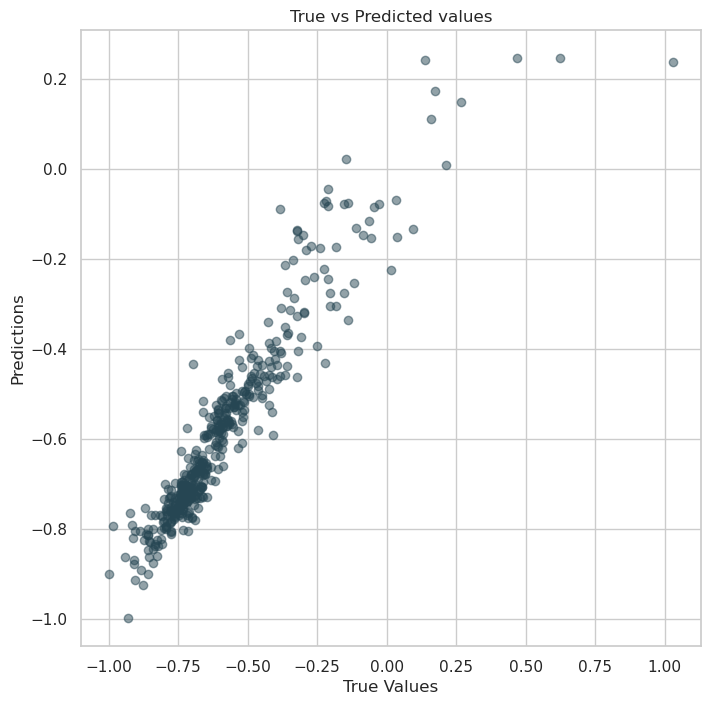

In [36]:
# Plot y_pred vs y_test
plt.figure(figsize=(8, 8))
plt.scatter(y_test_scaled, y_pred_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted values')
plt.show()

In [37]:
history.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 248)            │        59,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 248)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 192)            │        47,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │         1,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325,157 (1.24 MB)

 Trainable params: 108,385 (423.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 216,772 (846.77 KB)

### Model Evaluation and Selection

Since this is a regression problem, we focus on the **R²** score and **MAE** for evaluation. Based on these metrics, the best models are the **Neural Networks**, and **Ridge Regression** with a transformed target variable, as they achieve the highest test scores. Additionally, the training scores are very similar, indicating good generalization. In contrast, other models have significantly higher training scores, suggesting overfitting and making them less reliable. However, the multi-layer perceptron also performs well after feature selection, feature engineering, or dimensionality reduction.